# Projectile motion

*This is the next evolutionary step. It allows user interaction without directly editing code. The code is reorganized, as it does not provide a guidence through a solution process anymore, and facilitates experimenting with values of parameters instead.*

## The question
We are trying to throw an object as far as possible. What is the optimal angle?

## Preparations

In [11]:
# @title Code to prepare the simulation { display-mode: "form" }
import numpy as np
import math
import matplotlib.pyplot as plt

def sim(angle_degrees):
    x = 0
    y = y_0
    angle = math.radians(angle_degrees)  # Convert angle from degrees to radians
    v_x = v_0 * math.cos(angle)  # Horizontal velocity
    v_y = v_0 * math.cos(math.pi/2 - angle)  # Vertical velocity
    trajectory_x = []  # Lists to store positions
    trajectory_y = []

    while y >= 0:  # Loop to calculate motion as long as the object flies
        trajectory_x.append(x)  # Store position
        trajectory_y.append(y)
        x += v_x * dt  # Update position based on horizontal velocity
        y += v_y * dt
        v_y += G * dt  # Update vertical velocity based on gravity

    trajectory_x.append(x)  # Append final position (on or under ground)
    trajectory_y.append(y)

    return trajectory_x, trajectory_y, angle_degrees  # Return coordinate lists

def run_simulations(results):
    angles = np.linspace(Angle_min , Angle_max, Angle_num)
    for angle in angles:
        results.append(sim(angle))

def plot_results(results):
    plt.figure(figsize=(8, 5)) # Create the plot
    for result in results:
        plt.plot(result[0], result[1], label=str(round(result[2],1))+"°")
    plt.title("Projectile motion trajectories for different angles")  # Set title
    plt.xlabel("Distance [m]")  # Set x-axis label
    plt.ylabel("Height [m]")  # Set y-axis label
    plt.grid(axis='y')  # Add grid lines only along the x-axis
    plt.legend()  # Show legend
    plt.show()

    # Find the most promising trajectory
    best = 0
    for i in range(len(results)):
        if results[i][0][-1] > results[best][0][-1]:
            best = i

    # plot the end of the found trajectory with a few neighbors
    plt.figure(figsize=(8, 5))

    for result in results[max(0,best-2):min(len(results),best+3)] :
        plt.plot(result[0][-3:], result[1][-3:], label=str(round(result[2],2)))
    plt.title("Projectile motion trajectories for most promising angles (detail view)")
    plt.xlabel("Distance [m]")
    plt.ylabel("Height [m]")
    plt.grid(axis='y')
    plt.legend()
    plt.show()


## The simulation & visualisation

Simulation successful, we have finished 10 trials.


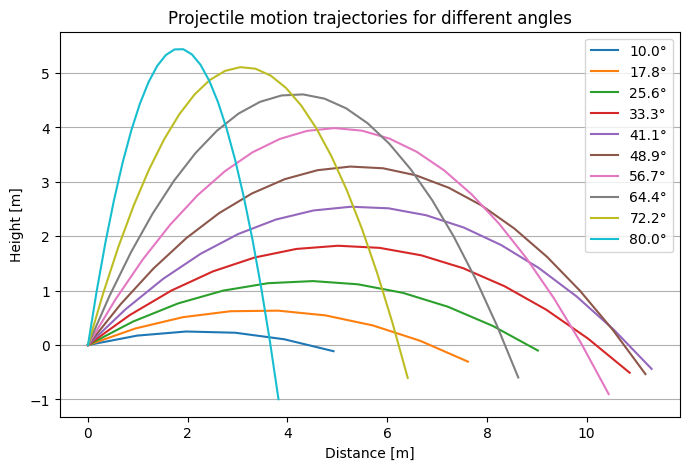

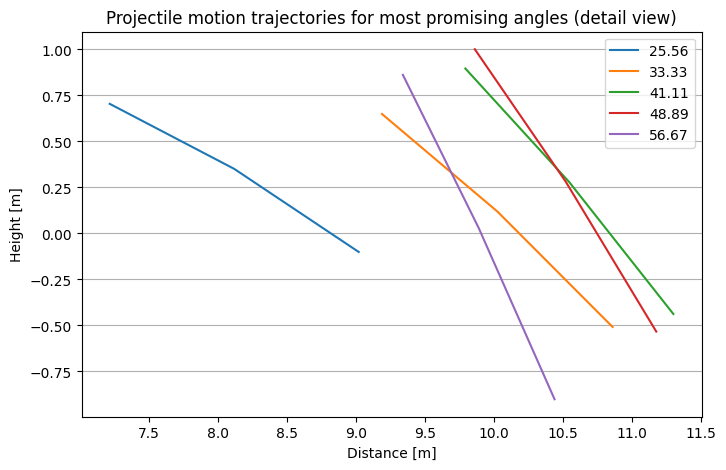

In [13]:
# @title Running the simulation {run:"auto", display-mode: "form" }
G = -9.81        # @param {type:"slider", min:-25, max:25, step:0.01}
y_0 = 0          # @param {type:"slider", min:0, max:1000, step:1}
v_0 = 10         # @param {type:"slider", min:0.1, max:100, step:0.01}
dt = .1          # @param {type:"slider", min:0.01, max:10, step:0.01}
Angle_min = 10   # @param {type:"slider", min:0, max:89, step:0.1}
Angle_max = 80   # @param {type:"slider", min:1, max:90, step:0.1}
Angle_num = 10   # @param {type:"slider", min:1, max:90, step:1}

results = [] 
run_simulations(results)
print(f"Simulation successful, we have finished {len(results)} trials.")
plot_results(results)

## The model

We do not want to simulate the whole universe, so we make some assumptions. Our work will become much easier, without distorting the results and conclusions too much.

* We assume we are on Earth.
 * Gravitational pull is constant.
 * Our throw is negligible in comparison to the diameter of the planet.
* The object we throw is a mass point: no size, so no balance, no rotation, no friction...

We describe the position of the point using carthesian coordinates.
The point moves according to the horizontal and vertical components of its velocity. The vertical velocity is changed by gravity.

## Evaluation

*You need to complete the evaluation yourself.*

The last figure shows us that the optimal angle is between... $some\ °$ and $some\ other\ °$.

A close look reveals that the $???$ line is the furthest to the right, reaching the highest distance among simulated angles. Other trajectories recede to the left.

## Result

*You need to decide on the results and complete them yourself.*

Based on the results of our simulation, we can conclude that the optimal angle to throw an object from $???\ m$ at $???\ ms^{-1}$ is between $???°$ and $???°$. This is under the assumptions listed above, namely Earth with the atmosphere lost.

Whether this matches other methods, e.g. direct analytical calculation and experimentation, is yet to be determined.